#### WSDM - KKBox's Music Recommendation Challenge

importing libraries

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')

import string
import math
import missingno as msno

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

import lightgbm as lgbm
import xgboost as xgb
import catboost as cb

In [3]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
songs_df = pd.read_csv('songs.csv')
song_extra_info_df = pd.read_csv('song_extra_info.csv')
members_df = pd.read_csv('members.csv')

In [4]:
print('DATA LOADING  COMPLETE: ')
print(train_df.shape, test_df.shape, songs_df.shape, song_extra_info_df.shape,  members_df.shape)

DATA LOADING  COMPLETE: 
(7377418, 6) (2556790, 6) (2296320, 7) (2295971, 3) (34403, 7)


In [5]:
train_df.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1


In [6]:
train_df.isnull().sum()

msno                       0
song_id                    0
source_system_tab      24849
source_screen_name    414804
source_type            21539
target                     0
dtype: int64

In [7]:
test_df.head()

,id,msno,song_id,source_system_tab,source_screen_name,source_type
0,0,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,WmHKgKMlp1lQMecNdNvDMkvIycZYHnFwDT72I5sIssc=,my library,Local playlist more,local-library
1,1,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,y/rsZ9DC7FwK5F2PK2D5mj+aOBUJAjuu3dZ14NgE0vM=,my library,Local playlist more,local-library
2,2,/uQAlrAkaczV+nWCd2sPF2ekvXPRipV7q0l+gbLuxjw=,8eZLFOdGVdXBSqoAv5nsLigeH2BvKXzTQYtUM53I0k4=,discover,NaN,song-based-playlist
3,3,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,ztCf8thYsS4YN3GcIL/bvoxLm/T5mYBVKOO4C9NiVfQ=,radio,Radio,radio
4,4,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,MKVMpslKcQhMaFEgcEQhEfi5+RZhMYlU3eRDpySrH8Y=,radio,Radio,radio


In [8]:
test_df.isnull().sum()

id                         0
msno                       0
song_id                    0
source_system_tab       8442
source_screen_name    162883
source_type             7297
dtype: int64

In [9]:
songs_df.head()

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,NaN,NaN,31.0
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,湯小康,徐世珍,3.0
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,貴族精選,Traditional,Traditional,52.0


In [10]:
song_extra_info_df.head()

,song_id,name,isrc
0,LP7pLJoJFBvyuUwvu+oLzjT+bI+UeBPURCecJsX1jjs=,我們,TWUM71200043
1,ClazTFnk6r0Bnuie44bocdNMM3rdlrq0bCGAsGUWcHE=,Let Me Love You,QMZSY1600015
2,u2ja/bZE3zhCGxvbbOB3zOoUjx27u40cf5g09UXMoKQ=,原諒我,TWA530887303
3,92Fqsy0+p6+RHe2EoLKjHahORHR1Kq1TBJoClW9v+Ts=,Classic,USSM11301446
4,0QFmz/+rJy1Q56C1DuYqT9hKKqi5TUqx0sN0IwvoHrw=,愛投羅網,TWA471306001


In [11]:
song_extra_info_df.isnull().sum()

song_id         0
name            2
isrc       136548
dtype: int64

In [12]:
members_df.head()

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,20110820,20170920
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,20150628,20170622
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,20160411,20170712
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,20150906,20150907
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,20170126,20170613


In [13]:
members_df.isnull().sum()

msno                          0
city                          0
bd                            0
gender                    19902
registered_via                0
registration_init_time        0
expiration_date               0
dtype: int64

cleaning and featuring on the dataframes

In [14]:
songs_df.genre_ids.value_counts()

465              567911
958              176349
2022             168870
1609             166457
2122             139938
                  ...  
465|139|388           1
409|1609              1
139|94|2022           1
352|1944|1995         1
1138|2022             1
Name: genre_ids, Length: 1045, dtype: int64

In [15]:
df_id = songs_df["genre_ids"].str.split('|')

In [16]:
import time
start = time.time()
songs_df = pd.concat([songs_df.drop('genre_ids' , axis=1), df_id.apply(pd.Series)], axis=1)
end = time.time()
print(end - start)

1633.4335794448853


In [19]:
songs_df.loc[songs_df['language'].isnull(),'language'] = 31.0

In [20]:
songs_df.isnull().sum()

song_id              0
song_length          0
artist_name          0
composer       1071354
lyricist       1945268
language             0
0                94116
1              2123444
2              2262277
3              2286341
4              2295089
5              2296157
6              2296247
7              2296309
dtype: int64

In [21]:
members_df.head()

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,20110820,20170920
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,20150628,20170622
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,20160411,20170712
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,20150906,20150907
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,20170126,20170613


In [22]:
# registration_init_time
members_df['registration_init_time'] = pd.to_datetime(members_df['registration_init_time'], format='%Y%m%d')
members_df['reg_year'] = members_df['registration_init_time'].dt.year
members_df['reg_month'] = members_df['registration_init_time'].dt.month
members_df['reg_day'] = members_df['registration_init_time'].dt.day
#expiration_date
members_df['expiration_date'] = pd.to_datetime(members_df['expiration_date'], format='%Y%m%d')
members_df['exp_year'] = members_df['expiration_date'].dt.year
members_df['exp_month'] = members_df['expiration_date'].dt.month
members_df['exp_day'] = members_df['expiration_date'].dt.day

In [24]:
members_df.drop(['registration_init_time','expiration_date'], axis = 1, inplace = True)
members_df.head()

,msno,city,bd,gender,registered_via,reg_year,reg_month,reg_day,exp_year,exp_month,exp_day
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,2011,8,20,2017,9,20
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,2015,6,28,2017,6,22
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,2016,4,11,2017,7,12
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,2015,9,6,2015,9,7
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,2017,1,26,2017,6,13


In [25]:
#cleaning bd and gender
members_df['bd'] = members_df['bd'].apply(lambda x : 0 if x > 100 else abs(x) )
members_df['gender'] = members_df['gender'].astype("category").cat.codes

In [28]:
train_age = members_df[members_df['bd'] != 0].copy()
y_train_age = train_age['bd']
train_age.drop(['msno' , 'bd', 'gender'], axis = 1, inplace = True)
test_age = members_df[members_df['bd'] == 0].copy()
y_test_age = test_age['bd']
test_age.drop(['msno' , 'bd' , 'gender'], axis = 1, inplace = True)
train_age.head()

,city,registered_via,reg_year,reg_month,reg_day,exp_year,exp_month,exp_day
5,13,9,2012,7,3,2017,10,6
10,12,9,2006,5,31,2017,8,16
13,15,3,2015,9,15,2017,10,19
15,13,3,2014,4,10,2017,4,27
16,13,9,2007,3,30,2017,6,12


In [31]:
#classifying age and gender since values of 0 are alot

from catboost import CatBoostClassifier, CatBoostRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics  import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE

Model = CatBoostRegressor(verbose = 0)
Model.fit(train_age.values, y_train_age.values.ravel())
cv_score = np.sqrt(-cross_val_score(Model, train_age.values, y_train_age.values.ravel(), cv=3, scoring='neg_mean_squared_error').mean())
cv_score

8.873272710866614

In [34]:
Preds_age = Model.predict(test_age.values)
Preds_age = Preds_age.round()
Preds_age

array([38., 25., 24., ..., 28., 28., 27.])

In [35]:
members_df['bd'].value_counts()

0     19954
22      751
27      750
24      740
26      719
      ...  
90        1
2         1
70        1
3         1
10        1
Name: bd, Length: 80, dtype: int64

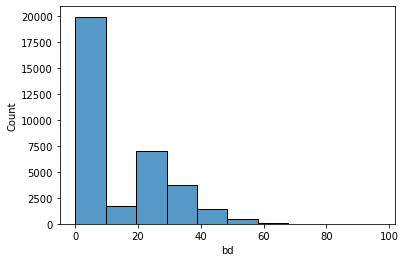

In [36]:
sns.histplot(x='bd' , data = members_df, bins = 10)
plt.show()

In [38]:
corr=members_df.corr()
print(corr.shape)
print(corr)

(10, 10)
                    city        bd    gender  registered_via  reg_year  \
city            1.000000  0.629848  0.630006        0.230640 -0.423917   
bd              0.629848  1.000000  0.802183        0.264662 -0.525176   
gender          0.630006  0.802183  1.000000        0.188102 -0.450716   
registered_via  0.230640  0.264662  0.188102        1.000000 -0.566687   
reg_year       -0.423917 -0.525176 -0.450716       -0.566687  1.000000   
reg_month       0.011073  0.016605  0.021492        0.017475 -0.124453   
reg_day         0.001993  0.000754 -0.000898        0.010375 -0.017262   
exp_year        0.146133  0.136141  0.125433        0.198023 -0.103490   
exp_month       0.075202  0.076458  0.068464        0.170417 -0.201975   
exp_day         0.018279  0.040644  0.029563        0.066786 -0.067734   

                reg_month   reg_day  exp_year  exp_month   exp_day  
city             0.011073  0.001993  0.146133   0.075202  0.018279  
bd               0.016605  0.000754  0

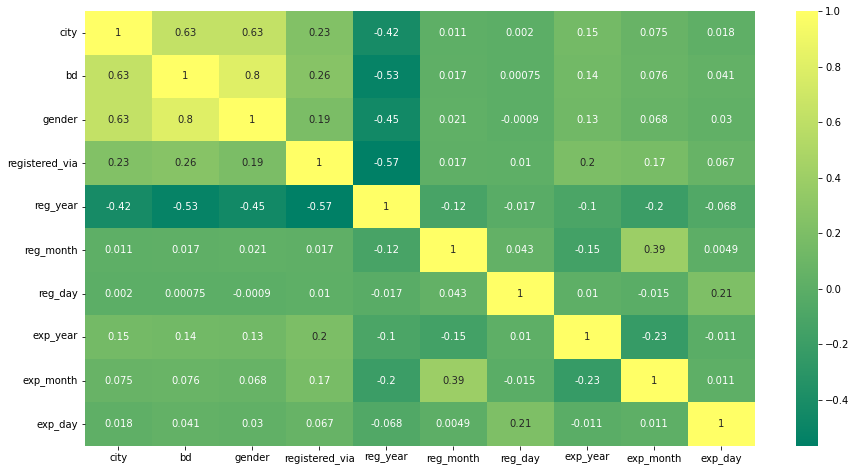

In [39]:
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot = True, cmap = 'summer')
plt.show()

In [40]:
type(members_df)

pandas.core.frame.DataFrame

In [41]:
members_df.dtypes

msno              object
city               int64
bd                 int64
gender              int8
registered_via     int64
reg_year           int64
reg_month          int64
reg_day            int64
exp_year           int64
exp_month          int64
exp_day            int64
dtype: object

In [42]:
members_df.duplicated().sum()

0

<AxesSubplot:title={'center':'members_bd'}>

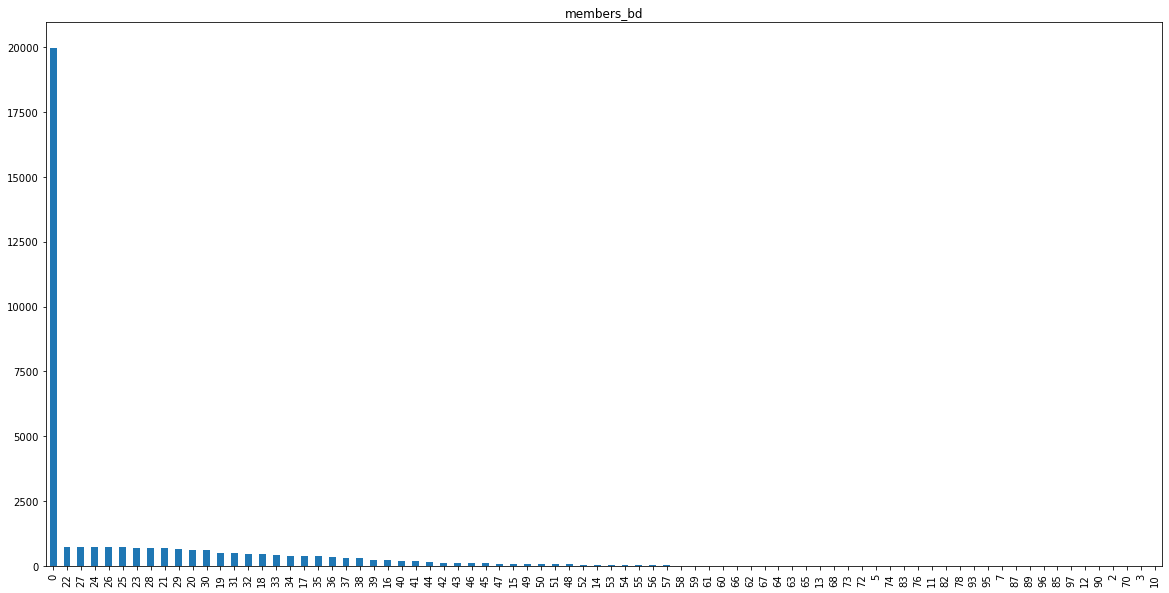

In [43]:
plt.subplot()
members_df['bd'].value_counts().plot(kind='bar', title='members_bd', figsize=(20,10))

<AxesSubplot:>

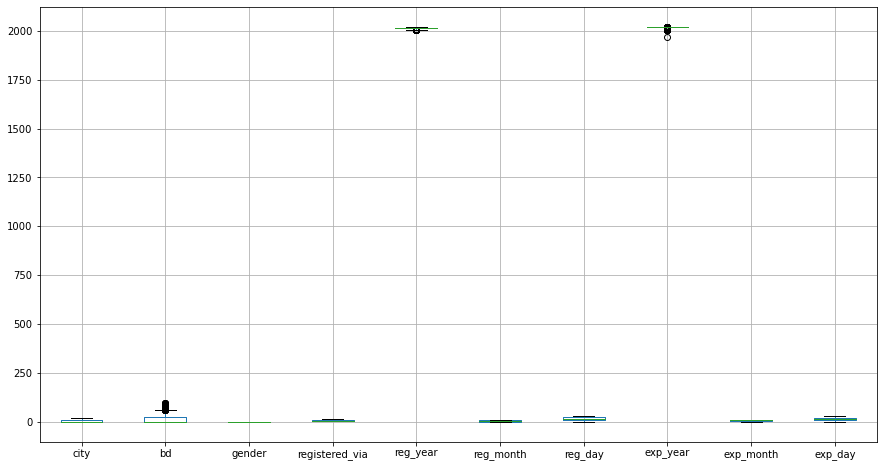

In [46]:
plt.figure(figsize=(15,8))
members_df.boxplot()

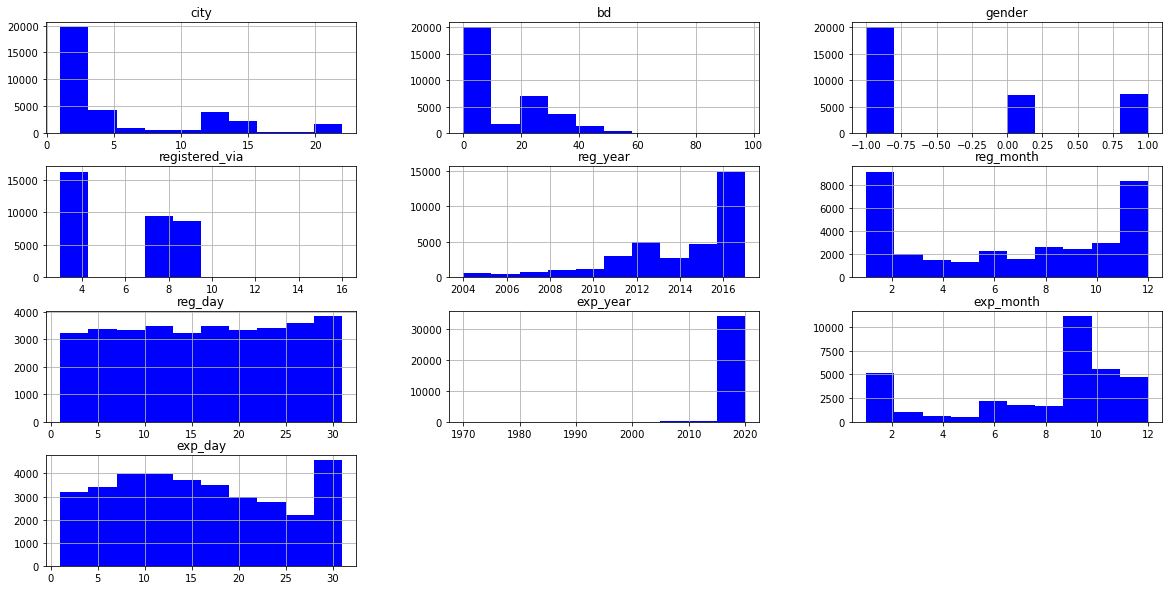

In [47]:
members_df.hist(color='blue', figsize=(20,10))
plt.show()

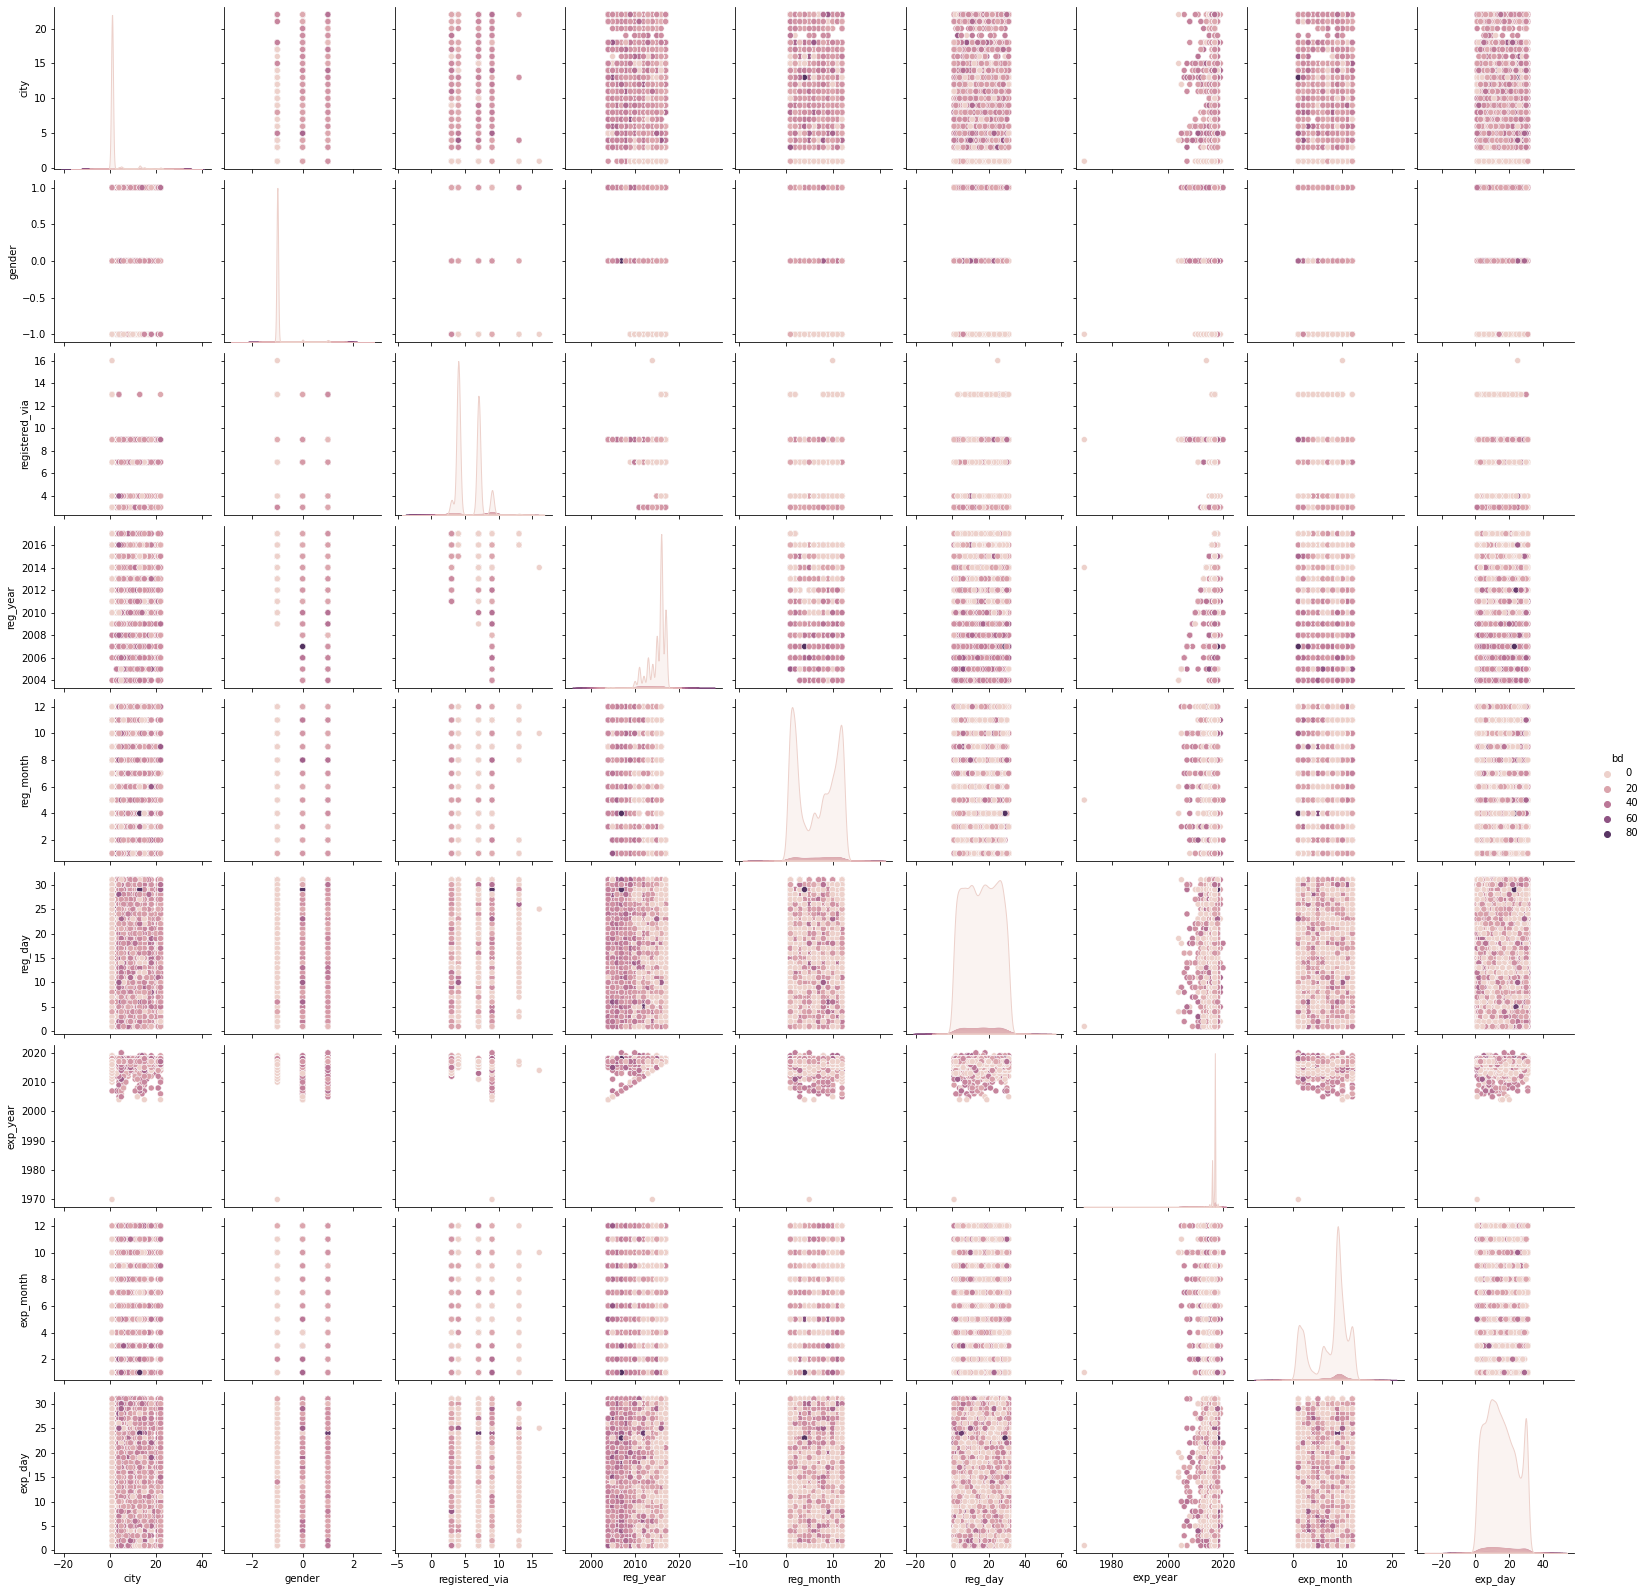

In [48]:
sns.pairplot(data=members_df, hue='bd')
plt.show()

In [49]:
age_nulls_indexes = members_df[members_df['bd'] == 0].index
j = 0
for i in age_nulls_indexes :
    members_df.loc[i, 'bd'] = Preds_age[j]
    j += 1
    
members_df['bd'].value_counts()

26    3537
27    3410
28    2884
25    2813
29    2671
      ... 
90       1
76       1
2        1
97       1
10       1
Name: bd, Length: 79, dtype: int64

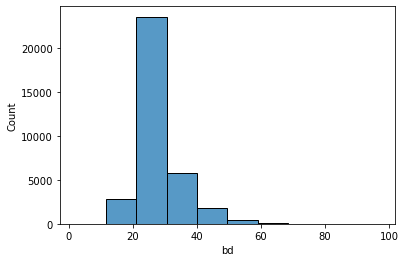

In [50]:
sns.histplot(x='bd' , data = members_df, bins = 10)
plt.show()

In [51]:
train_gender = members_df[members_df['gender'] !=0].copy()
y_train_gender = train_gender['gender']
train_gender.drop(['msno', 'gender'], axis=1, inplace=True)
test_gender = members_df[members_df['gender'] == 0].copy()
y_test_gender = test_gender['gender']
test_gender.drop(['msno' , 'gender'], axis = 1, inplace = True)

In [52]:
Model=CatBoostClassifier(verbose=0)
Model.fit(train_gender.values, y_train_gender.values.ravel())
cv_score = cross_val_score(Model, train_gender.values, y_train_gender.values.ravel(), cv=3, scoring='accuracy').mean()
cv_score

0.947412853085869

In [53]:
predictions = Model.predict(test_gender.values)

In [54]:
members_df['gender'].value_counts()

-1    19902
 1     7405
 0     7096
Name: gender, dtype: int64

In [56]:
gender_nulls_indexes = members_df[members_df['gender'] == 0].index
j = 0
for i in gender_nulls_indexes:
    members_df.loc[i, 'gender'] = predictions[j]
    j += 1
    
members_df['gender'].value_counts()

-1    20466
 1    13937
Name: gender, dtype: int64

In [58]:
members_df.head()

,msno,city,bd,gender,registered_via,reg_year,reg_month,reg_day,exp_year,exp_month,exp_day
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,38,-1,7,2011,8,20,2017,9,20
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,25,-1,7,2015,6,28,2017,6,22
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,24,-1,4,2016,4,11,2017,7,12
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,33,-1,9,2015,9,6,2015,9,7
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,25,-1,4,2017,1,26,2017,6,13


In [60]:
# merging the trin nd test datfrmes for preprocessing
ntrain = train_df.shape[0]
n_test = test_df.shape[0]
y_train = train_df['target'].values
test_IDs = test_df['msno'].copy()
all_data = pd.concat((train_df.drop('target',axis =1), test_df)).reset_index(drop=True)
print("all_data size is : {}".format(all_data.shape))

all_data size is : (9934208, 6)


In [61]:
all_data.drop('id', axis=1, inplace=True)
all_data = all_data.merge(members_df, on='msno', how='left')
all_data = all_data.merge(songs_df, on = 'song_id', how ='left') 

In [62]:
del [[members_df, songs_df]]
import gc
gc.collect()

380737

In [64]:
for i in range(0,8):
    all_data[i] = all_data[i].fillna(0)

all_data[0].value_counts()

465     5062629
458     1651779
921      610930
1609     450948
444      378968
         ...   
87            1
2015          1
1579          1
751           1
303           1
Name: 0, Length: 165, dtype: int64

In [65]:
for i in range(0,8):
    all_data[i] = all_data[i].astype('category').cat.codes
    
all_data[0].value_counts()

118    5062629
117    1651779
154     610930
46      450948
115     378968
        ...   
148          1
64           1
43           1
137          1
101          1
Name: 0, Length: 165, dtype: int64

In [66]:
nulls_cols = all_data.isnull().sum()
nulls_cols = nulls_cols[nulls_cols != 0]
list(nulls_cols.keys())

['source_system_tab',
 'source_screen_name',
 'source_type',
 'song_length',
 'artist_name',
 'composer',
 'lyricist',
 'language']

In [69]:
for col in list(nulls_cols.keys()): 
    all_data[col] = all_data[col].fillna(all_data[col].mode()[0])
    
all_data.isnull().sum()

msno                  0
song_id               0
source_system_tab     0
source_screen_name    0
source_type           0
city                  0
bd                    0
gender                0
registered_via        0
reg_year              0
reg_month             0
reg_day               0
exp_year              0
exp_month             0
exp_day               0
song_length           0
artist_name           0
composer              0
lyricist              0
language              0
0                     0
1                     0
2                     0
3                     0
4                     0
5                     0
6                     0
7                     0
dtype: int64

In [70]:
all_data.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,city,bd,gender,registered_via,reg_year,reg_month,reg_day,exp_year,exp_month,exp_day,song_length,artist_name,composer,lyricist,language,0,1,2,3,4,5,6,7
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1,30,-1,7,2012,1,2,2017,10,5,206471.0,Bastille,Dan Smith| Mark Crew,阿信,52.0,105,0,0,0,0,0,0,0
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,13,24,1,9,2011,5,25,2017,9,11,284584.0,Various Artists,周杰倫,阿信,52.0,34,0,0,0,0,0,0,0
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,13,24,1,9,2011,5,25,2017,9,11,225396.0,Nas,N. Jones、W. Adams、J. Lordan、D. Ingle,阿信,52.0,34,0,0,0,0,0,0,0
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,13,24,1,9,2011,5,25,2017,9,11,255512.0,Soundway,Kwadwo Donkoh,阿信,-1.0,4,0,0,0,0,0,0,0
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1,30,-1,7,2012,1,2,2017,10,5,187802.0,Brett Young,Brett Young| Kelly Archer| Justin Ebach,阿信,52.0,3,0,0,0,0,0,0,0


In [71]:
all_data[['composer']].nunique()

composer    86438
dtype: int64

In [72]:
categorical_col = ['city','gender','registered_via','language','artist_name','composer','lyricist']
for col in all_data.columns:
    if all_data[col].dtype in [bool ,object, 'category'] and len(all_data[col].unique()) <= 50:
        categorical_col.append(col)
        
categorical_col

['city',
 'gender',
 'registered_via',
 'language',
 'artist_name',
 'composer',
 'lyricist',
 'source_system_tab',
 'source_screen_name',
 'source_type']

In [73]:
for col in categorical_col:
    all_data[col] = all_data[col].astype("category").cat.codes
    
all_data.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,city,bd,gender,registered_via,reg_year,reg_month,reg_day,exp_year,exp_month,exp_day,song_length,artist_name,composer,lyricist,language,0,1,2,3,4,5,6,7
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,1,7,6,0,30,0,2,2012,1,2,2017,10,5,206471.0,3784,16653,35946,8,105,0,0,0,0,0,0,0
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,3,8,4,11,24,1,3,2011,5,25,2017,9,11,284584.0,36867,76812,35946,8,34,0,0,0,0,0,0,0
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,3,8,4,11,24,1,3,2011,5,25,2017,9,11,225396.0,24601,51540,35946,8,34,0,0,0,0,0,0,0
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,3,8,4,11,24,1,3,2011,5,25,2017,9,11,255512.0,31651,41991,35946,0,4,0,0,0,0,0,0,0
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,1,7,6,0,30,0,2,2012,1,2,2017,10,5,187802.0,5190,9701,35946,8,3,0,0,0,0,0,0,0


In [74]:
all_data['msno'].value_counts()

MXIMDXO0j3UpaT7FvOSGW6Y5zfhlh+xYjTqGoUdMzEE=    7894
o+5RNlSWrzvrphgBNGIo1FLkGxBgyICns6qXj3nS7Pk=    7318
FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=    7075
KGXNZ/H3VxvET/+rGxlrAe7Gpz2eKMXyuSg3xh8Ij1M=    6706
cqjRBV/jWN2ujhc+z/4tz+Mj6xEfflAAt6qBXCqxKvw=    5446
                                                ... 
U8+k0YmjY2aDIM7Wd9ejIF/XqZkoWbBlv+2booso86A=       1
0Yby35OBCWJyG0HOTIx003npPQ8mMY51ZI+Q6JulBqI=       1
YBw/FWdyTgpVStJFzPn0aVf3/dtQwxAiHmvAu3pxyoI=       1
g0cf2zdSgmLeBAHJZJZc85VD4l6f6xKkNegrh8VEAms=       1
q9mrx9lx8969hkkTf4h96PqKeeG0DTC5iMLuc/6VDSI=       1
Name: msno, Length: 34403, dtype: int64

In [75]:
print('in',all_data.columns.map(type))
all_data.columns = all_data.columns.astype(str)
print('out',all_data.columns.map(type))

in Index([<class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>,
       <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>,
       <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>,
       <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>,
       <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>,
       <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>,
       <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>],
      dtype='object')
out Index([<class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>,
       <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>,
       <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>,
       <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>,
       <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>,
       <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>,
       <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>],
      dtype='object')


In [76]:
train_data = all_data[:ntrain].copy()
test_data = all_data[ntrain:]
train_data['target'] = y_train

train_data.shape , test_data.shape

((7377418, 29), (2556790, 28))

In [77]:
train_data['target'].head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [78]:
train_data['target'] = train_data['target'].astype("category").cat.codes

train_data['target'].head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int8

In [79]:
X_train = train_data.drop(['target','msno','song_id'], axis = 1)
test_data = test_data.drop(['msno','song_id'],axis = 1)
y_train = train_data.target
X_train.shape , y_train.shape

((7377418, 26), (7377418,))

In [80]:
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, StratifiedKFold, RepeatedStratifiedKFold
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, Normalizer, PowerTransformer
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
test_data_scaled = scaler.transform(test_data)

X_train = X_train_scaled
test_data = test_data_scaled

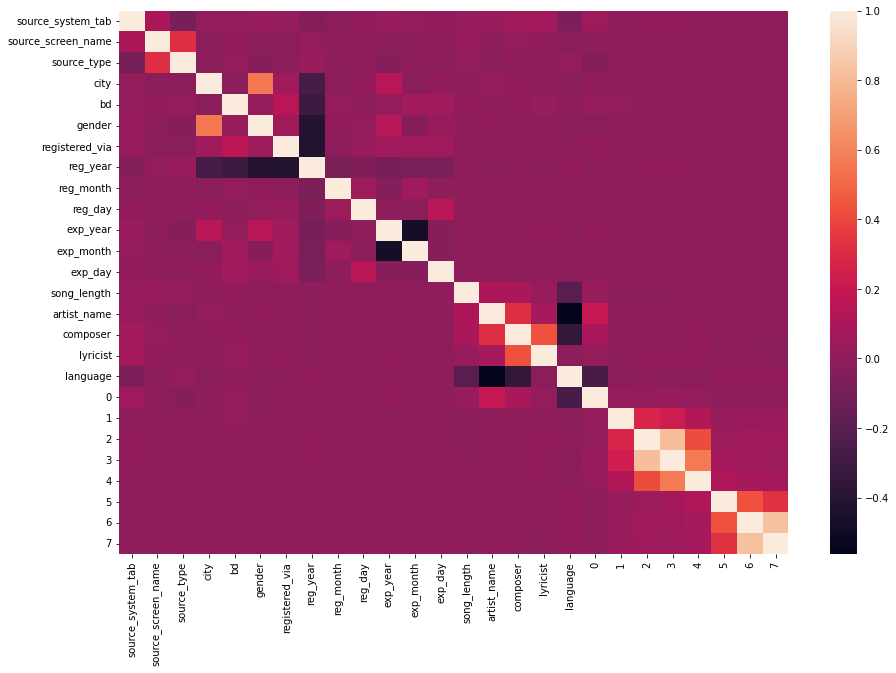

In [83]:
# Correlatio matrix
plt.figure(figsize=[15,10])
sns.heatmap(all_data.corr()) # annot = True
plt.show()

Modeling

In [84]:
all_data.columns

Index(['msno', 'song_id', 'source_system_tab', 'source_screen_name',
       'source_type', 'city', 'bd', 'gender', 'registered_via', 'reg_year',
       'reg_month', 'reg_day', 'exp_year', 'exp_month', 'exp_day',
       'song_length', 'artist_name', 'composer', 'lyricist', 'language', '0',
       '1', '2', '3', '4', '5', '6', '7'],
      dtype='object')

In [85]:
import lightgbm as lgb
start = time.time()
train_set = lgb.Dataset(X_train , y_train)
params = {
        'objective': 'binary',
        'metric': 'binary_logloss',
        'boosting': 'gbdt',
        'learning_rate': 0.3 ,
        'verbose': 0,
        'num_leaves': 216,
        'bagging_fraction': 0.95,
        'bagging_freq': 1,
        'bagging_seed': 1,
        'feature_fraction': 0.9,
        'feature_fraction_seed': 1,
        'max_bin': 510,
        'max_depth': 20,
        'num_rounds': 500,
        'metric' : 'auc'
    }

%time model_f1 = lgb.train(params, train_set=train_set,  valid_sets=train_set, verbose_eval=5)

end = time.time()
print(end - start)


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.620366 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[5]	training's auc: 0.690815
[10]	training's auc: 0.701464
[15]	training's auc: 0.710568
[20]	training's auc: 0.717087
[25]	training's auc: 0.723299
[30]	training's auc: 0.727702
[35]	training's auc: 0.731215
[40]	training's auc: 0.73462
[45]	training's auc: 0.737787
[50]	training's auc: 0.741584
[55]	training's auc: 0.743903
[60]	training's auc: 0.74653
[65]	training's auc: 0.748626
[70]	training's auc: 0.750576
[75]	training's auc: 0.753624
[80]	training's auc: 0.755447
[85]	training's auc: 0.757471
[90]	training's auc: 0.7588
[95]	training's auc: 0.760039
[100]	training's auc: 0.762045
[105]	training's auc: 0.76393
[110]	training's auc: 0.765389
[115]	training's auc: 0.766623
[120]	training's auc: 0.767724
[125]	training's auc: 0.768819
[130]	training's auc:

In [86]:
predictions = model_f1.predict(pd.DataFrame(test_data).values)
sub = pd.DataFrame()
sub['id'] = test_df['id']
sub['target'] = predictions
sub.to_csv('sample_submission.csv',index=False)
sub.head()

,id,target
0,0,0.536430
1,1,0.619787
2,2,0.088096
3,3,0.099379
4,4,0.122502


THANK YOU